* What is Euler's Method?: https://www.youtube.com/watch?v=ukNbG7muKho&t
* Central Difference Approximation: https://www.youtube.com/watch?v=VqR905Kr83Y


$$\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}$$

Central Difference Approximation:

$$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2}$$


* $\frac{\partial u}{\partial t}$ tells you how to move to the next grid in time. 
* $\frac{\partial u}{\partial x}$ tells you how to compare yourself to your neighbor in space.
* $u_i^{n+1}$: The temperature at point $i$ at the next time step.
* $u_i^n$: The temperature at point $i$ right now.

$$u_i^{new} = u_i^{old} + \Delta t \cdot \underbrace{\left[ \alpha \frac{u_{i+1}^{old} - 2u_i^{old} + u_{i-1}^{old}}{(\Delta x)^2} \right]}_{\text{This is the "slope" in time}}$$


* The "Spatial" Snapshot: $f(u_i) = \alpha \frac{u_{i+1} - 2u_i + u_{i-1}}{(\Delta x)^2}$
* The Euler Step: Now apply the standard Euler formula $y_{n+1} = y_n + \Delta t \cdot f(y_n)$:

The Stability Criterion
For the simulation to remain stable and not "explode" (mathematically diverge), you must satisfy the following condition:

$$\frac{\alpha \Delta t}{(\Delta x)^2} \leq \frac{1}{2}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

MAX_TEMP_LABEL = 2000

<h1> 1D </h1>

In [2]:
N = 100
u = np.zeros(N)

u[int(len(u) * 0.4): int(len(u) * 0.6)] = MAX_TEMP_LABEL

dt = 0.1
dx = 1
alpha = 1

gamma = (alpha * dt) / (dx**2)
if gamma > 0.5:
    print(f"Warning: Simulation may be unstable. Gamma: {gamma:.4f}")

def diffuse_t_1D(u):
  for i in range(1, u.shape[0] - 1):
    u_curr = u[i]
    u_back = u[i - 1]
    u_forw = u[i + 1]
    u[i] = u_curr + gamma * (u_forw - 2*u_curr + u_back)

curr_t = 0

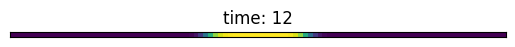

In [15]:
plt.xticks([])
plt.yticks([])
plt.imshow(u.reshape(1, N))
plt.title(f'time: {curr_t}')
curr_t += 1
diffuse_t_1D(u)

<h1> 2D </h1>

$$\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)$$

$$f(u_{i,j}) = \alpha \left[ \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{(\Delta x)^2} + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{(\Delta y)^2} \right]$$

$$u_{i,j}^{new} = u_{i,j}^{old} + \Delta t \cdot \alpha \left[ \frac{u_{i+1,j}^{old} - 2u_{i,j}^{old} + u_{i-1,j}^{old}}{(\Delta x)^2} + \frac{u_{i,j+1}^{old} - 2u_{i,j}^{old} + u_{i,j-1}^{old}}{(\Delta y)^2} \right]$$

Stricter Stability: In 2D, the stability criterion becomes even more restrictive. If we assume $\Delta x = \Delta y$, the limit is:$$\frac{\alpha \Delta t}{(\Delta x)^2} \leq \frac{1}{4}$$

if $\Delta x = \Delta y = h$:

$$u_{i,j}^{new} = u_{i,j}^{old} + \frac{\alpha \Delta t}{h^2} \left[ u_{i+1,j}^{old} + u_{i-1,j}^{old} + u_{i,j+1}^{old} + u_{i,j-1}^{old} - 4u_{i,j}^{old} \right]$$

In [349]:
N = 100

u = np.zeros((N, N))

u[
  int(len(u) * 0.4): int(len(u) * 0.6),
  int(len(u) * 0.4): int(len(u) * 0.6)
] = MAX_TEMP_LABEL

dt = 0.1
dx = 1
alpha = 1

gamma = (alpha * dt) / (dx**2)
if gamma > 0.5:
    print(f"Warning: Simulation may be unstable. Gamma: {gamma:.4f}")


def diffuse_t_2D(u):
  start_time = time.perf_counter()

  for i in range(1, u.shape[0] - 1):
    for j in range(1, u.shape[1] - 1):
      u_curr = u[i, j]
      u_i_next = u[i + 1, j]
      u_i_prev = u[i - 1, j]
      u_j_next = u[i, j + 1]
      u_j_prev = u[i, j - 1]
     
      u[i, j] = u_curr + gamma * (u_i_next + u_i_prev + u_j_next + u_j_prev - 4*u_curr)

  end_time = time.perf_counter()
  run_time = end_time - start_time
  print(f"Calc time: {run_time:.4f} seconds")
curr_t = 0

Calc time: 0.0058 seconds


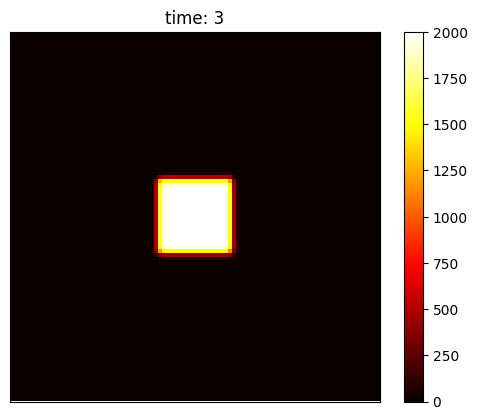

In [353]:
plt.xticks([])
plt.yticks([])
plt.imshow(u.reshape(N, N), cmap='hot')
plt.colorbar()
plt.title(f'time: {curr_t}')
curr_t += 1
diffuse_t_2D(u)

# Laplacian Kernel

# Cuda GPU

In [424]:
import torch
import torch.nn as nn

N = 1000

u = np.zeros((N, N))

u[
  int(len(u) * 0.4): int(len(u) * 0.6),
  int(len(u) * 0.4): int(len(u) * 0.6)
] = MAX_TEMP_LABEL

dt = 0.1
dx = 1
alpha = 1

gamma = (alpha * dt) / (dx**2)
if gamma > 0.5:
    print(f"Warning: Simulation may be unstable. Gamma: {gamma:.4f}")

device = torch.device("cuda")
print(torch.cuda.is_available())

kernel_gpu = torch.tensor([
  [0, 1, 0],
  [1, -4, 1],
  [0, 1, 0]
], device=device, dtype=torch.float32).view(1, 1, 3, 3)
u_gpu = torch.tensor(u, device=device, dtype=torch.float32).view(1, 1, N, N)

def GPU_diffuse_t_2D(repeats):
  global u_gpu
  start_time = time.perf_counter()

  for _ in range(repeats):
    u_processed = nn.functional.conv2d(
      u_gpu,
      kernel_gpu,
      padding=1
    )

    u_gpu += u_processed.squeeze() * gamma

  end_time = time.perf_counter()
  run_time = end_time - start_time
  print(f"Calc time: {run_time:.4f} seconds")

curr_t = 0

True


Calc time: 0.0053 seconds


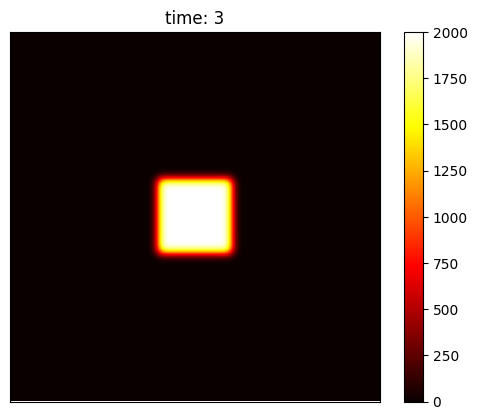

In [431]:
plt.xticks([])
plt.yticks([])

GPU_diffuse_t_2D(100)

u_cpu = u_gpu.reshape(N, N).detach().cpu()

plt.imshow(u_cpu, cmap='hot', interpolation='none')
plt.colorbar()
plt.title(f'time: {curr_t}')
curr_t += 1